In [1]:
import matplotlib.pyplot as plt
import cv2

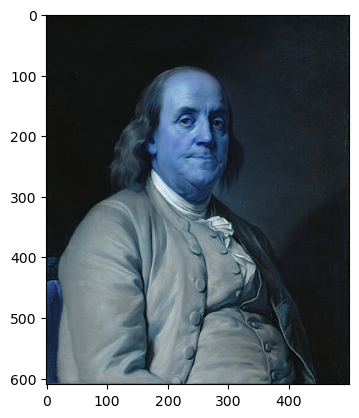

In [3]:
img = cv2.imread('benjamin_franklin.jpg')
plt.imshow(img)

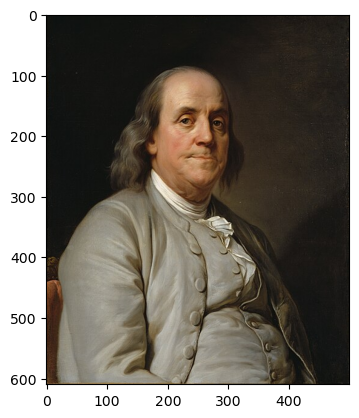

In [5]:
img = cv2.imread('benjamin_franklin.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

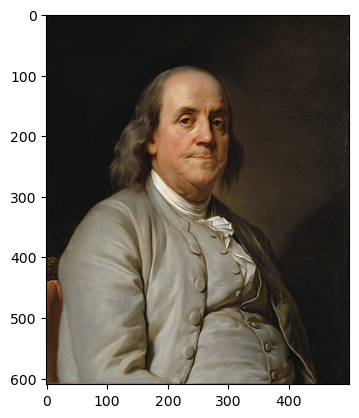

In [7]:
img = plt.imread('benjamin_franklin.jpg')
plt.imshow(img)

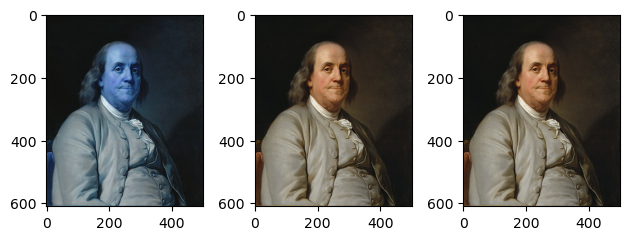

In [9]:
img = cv2.imread('benjamin_franklin.jpg')
img1 = plt.imread('benjamin_franklin.jpg')
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1).imshow(img)
plt.subplot(1,3,2).imshow(img1)
plt.subplot(1,3,3).imshow(cvt_img)

plt.tight_layout()
plt.show()

In [11]:
img = cv2.imread('benjamin_franklin.jpg')
cv2.imshow('Benjamin',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Detecting face from an image

In [14]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('benjamin_franklin.jpg')            # here I am not using this image to detect face
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_img, 1.11, 5)

for (x,y,w,h) in faces:
    print(x,y)
    print(w,h)
    cv2.rectangle(gray_img,
                 (x,y),
                 (x+w,y+h),
                 (255,0,0),
                 3)

cv2.imshow("Benjamin",gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# this is giving gray image and black box on face

160 101
177 177


In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('benjamin_franklin.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # here I am not using this image to detect face 

faces = face_cascade.detectMultiScale(img,1.11,5)

for (x,y,w,h) in faces:
    print(x,y)
    print(w,h)
    cv2.rectangle(img,
                 (x,y),
                 (x+w,y+h),
                 (0,255,255),
                 3)

cv2.imshow("Benjamin",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# this is giving original image and yellow box on face

160 101
177 177


- Detecting face from a live video (local system camera)

In [19]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)   # Start the video

while cap.isOpened():      # True or False

    # has_ frame >> Type: bool (True or False) -- If the webcam is working and a frame is captured → has_frame = True
    #                                          -- If something goes wrong (e.g., camera disconnected, permission denied) → has_frame = False
    # frame >> Type: numpy.ndarray -- This is the actual image captured from the webcam, typically a 3D NumPy array representing the BGR image.
    has_frame,frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(image,1.1,4)

    for (x,y,w,h) in faces:
        # print(x,y)
        # print(w,h)
        cv2.rectangle(image, (x,y), (x+h,y+w), (255,0,0), 3)

    cv2.imshow('Akshay',image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# camera showing video in gray channel

In [21]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)   # Start the video

while cap.isOpened():      # True or False

    # has_ frame >> Type: bool (True or False) -- If the webcam is working and a frame is captured → has_frame = True
    #                                          -- If something goes wrong (e.g., camera disconnected, permission denied) → has_frame = False
    # frame >> Type: numpy.ndarray -- This is the actual image captured from the webcam, typically a 3D NumPy array representing the BGR image.
    has_frame,frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(frame,1.1,4)

    for (x,y,w,h) in faces:
        # print(x,y)
        # print(w,h)
        cv2.rectangle(frame, (x,y), (x+h,y+w), (255,0,0), 3)

    cv2.imshow('Akshay',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# camera showing video in BGR channel

- Face and Eye Detection of an image

    - for gray image

In [24]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('benjamin_franklin.jpg')           # here I am not using this image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_img, 1.11, 5)

for (x,y,w,h) in faces:
    print(x,y)
    print(w,h)
    cv2.rectangle(gray_img,
                 (x,y),
                 (x+w,y+h),
                 (255,0,0),
                 3)

    # Region of interest for eyes
    roi_gray = gray_img[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]   # here I am not using this image
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (e_x,e_y,e_w,e_h) in eyes:
        print(e_x,e_y)
        print(e_w,e_h)
        cv2.rectangle(roi_gray,
                     (e_x,e_y),
                     (e_x + e_w, e_y + e_h),
                     (255,0,0),
                     2)

cv2.imshow("Benjamin",gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

160 101
177 177
109 67
25 25
50 51
45 45


- Face and Eye Detection of an image

    - for color image (BGR)

In [27]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('benjamin_franklin.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # here I am not using this image

faces = face_cascade.detectMultiScale(img, 1.11, 5)

for (x,y,w,h) in faces:
    print(x,y)
    print(w,h)
    cv2.rectangle(img,
                 (x,y),
                 (x+w,y+h),
                 (0,255,255),
                 3)

    # Region of interest for eyes
    roi_gray = gray_img[y:y + h, x:x + w]    # here I am not using this image
    roi_color = img[y:y + h, x:x + w]   
    
    eyes = eye_cascade.detectMultiScale(roi_color)
    for (e_x,e_y,e_w,e_h) in eyes:
        print(e_x,e_y)
        print(e_w,e_h)
        cv2.rectangle(roi_color,
                     (e_x,e_y),
                     (e_x + e_w, e_y + e_h),
                     (255,0,0),
                     2)

cv2.imshow("Benjamin",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

160 101
177 177
109 67
25 25
50 51
45 45


- Face and Eye Detection of live camera video

     - for gray channel 

In [30]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)   # Start the video

while cap.isOpened():      # True or False

    # has_ frame >> Type: bool (True or False) -- If the webcam is working and a frame is captured → has_frame = True
    #                                          -- If something goes wrong (e.g., camera disconnected, permission denied) → has_frame = False
    # frame >> Type: numpy.ndarray -- This is the actual image captured from the webcam, typically a 3D NumPy array representing the BGR image.
    has_frame,frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(image,1.1,4)

    for (x,y,w,h) in faces:
        # print(x,y)
        # print(w,h)
        cv2.rectangle(image, (x,y), (x+h,y+w), (255,0,0), 3)

        # Region of interest for eyes
        roi_gray = image[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]   # here I am not using this image

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (e_x,e_y,e_w,e_h) in eyes:
            # print(e_x,e_y)
            # print(e_w,e_h)
            cv2.rectangle(roi_gray,
                         (e_x,e_y),
                         (e_x + e_w, e_y + e_h),
                         (255,0,0),
                         2)

    cv2.imshow('Akshay',image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# camera showing video in gray channel

- Face and Eye Detection of live camera video

     - for BGR channel (coclor)

In [33]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)   # Start the video

while cap.isOpened():      # True or False

    # has_ frame >> Type: bool (True or False) -- If the webcam is working and a frame is captured → has_frame = True
    #                                          -- If something goes wrong (e.g., camera disconnected, permission denied) → has_frame = False
    # frame >> Type: numpy.ndarray -- This is the actual image captured from the webcam, typically a 3D NumPy array representing the BGR image.
    has_frame,frame = cap.read()
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(frame,1.1,4)

    for (x,y,w,h) in faces:
        # print(x,y)
        # print(w,h)
        cv2.rectangle(frame, (x,y), (x+h,y+w), (255,0,0), 3)

        # Region of interest for eyes
        roi_gray = image[y:y + h, x:x + w]    # here I am not using this image
        roi_color = frame[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_color)
        for (e_x,e_y,e_w,e_h) in eyes:
            # print(e_x,e_y)
            # print(e_w,e_h)
            cv2.rectangle(roi_color,
                         (e_x,e_y),
                         (e_x + e_w, e_y + e_h),
                         (255,0,0),
                         2)

    cv2.imshow('Akshay',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# camera showing video in BGR channel

**Number Plate Detection**

- Detecting the number plate on car image

In [37]:
number_plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

img = cv2.imread('car_image.jpg')
img = cv2.resize(img,(620,820))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # here I am not using this image

plates = number_plate_cascade.detectMultiScale(img, 1.13, 5)

for (x,y,w,h) in plates:
    print(x,y)
    print(w,h)
    cv2.rectangle(img,
                 (x,y),
                 (x+w,y+h),
                 (0,255,255),
                 3)

cv2.imshow("Car",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

225 585
170 57


- Detecting the number plate on car video

| Variable | Type                        | Meaning                                         |
| -------- | --------------------------- | ----------------------------------------------- |
| `ret`    | `bool` (True or False)      | Frame read successfully (True) or not (False)   |
| `frame`  | `np.ndarray`                | Actual image from the video file                |


In [61]:
number_plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

cam = cv2.VideoCapture('number_plate_video.mp4')

frame_count = 0

while True:
    ret,frame = cam.read()   # to understand what is ret and frame see above table

    if not ret:
        print("Video ended or failed to read.")
        break

    # frame = cv2.resize(frame, (440,420))
    plates = number_plate_cascade.detectMultiScale(frame,
                                                    1.1,     # scaleFactor
                                                    5        # minNeighbors
                                                    )

    for (x,y,w,h) in plates:
        # print(x,y)
        # print(w,h)
        cv2.rectangle(frame,
                     (x,y),
                     (x+w,y+h),
                     (0,255,255),
                     3)

    cv2.imshow('Number Plate Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

In [63]:
number_plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

cam = cv2.VideoCapture('number_plate_video.mp4')

frame_count = 0

while True:
    ret,frame = cam.read()   # to understand what is ret and frame see above table

    if not ret:
        print("Video ended or failed to read.")
        break

    frame = cv2.resize(frame, (440,420))
    if frame_count % 2 == 0:
        plates = number_plate_cascade.detectMultiScale(frame,
                                                       1.1,     # scaleFactor
                                                       5        # minNeighbors
                                                      )
    frame_count += 1

    for (x,y,w,h) in plates:
        # print(x,y)
        # print(w,h)
        cv2.rectangle(frame,
                     (x,y),
                     (x+w,y+h),
                     (0,255,255),
                     3)

    cv2.imshow('Number Plate Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

Video ended or failed to read.
